In [1]:
import numpy as np
import pandas_datareader
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq  #imports pytrends for loading google trends data
pytrends = TrendReq(hl='en-US', tz=360)

In [2]:
start = datetime(2019,1,2)
end = datetime(2019,3,18)

In [3]:
def prices(name, start=start, end=end):
    '''returns a dataframe with stock-information for a given company'''
    return pandas_datareader.iex.daily.IEXDailyReader(name, start, end).read()

In [4]:
def searches(*kw_list):
    pytrends.build_payload(kw_list, cat=0, timeframe='2019-1-2 2019-3-18', geo='', gprop='')
    searches = pytrends.interest_over_time()
    return searches.drop(columns = "isPartial")

In [5]:
def combine_data_frames(df1, df2):
    return df1.join(df2, how='outer')

In [6]:
IBM_data = prices("IBM")
IBM_S = searches("IBM")
IBM = combine_data_frames(IBM_S, IBM_data)

In [7]:
IBM.head()

,IBM,open,high,low,close,volume
date,,,,,,
2019-01-02,55,110.7200,114.6443,110.4037,113.8831,4239924.0
2019-01-03,60,113.2110,113.5569,111.3921,111.6096,4346659.0
2019-01-04,63,113.5866,116.1369,113.1220,115.9688,4477755.0
2019-01-05,32,NaN,NaN,NaN,NaN,NaN
2019-01-06,30,NaN,NaN,NaN,NaN,NaN


In [43]:
IBM.columns=["searches", "open", "high", "low", "close", "volume"]

In [44]:
IBM.head()

,searches,open,high,low,close,volume
date,,,,,,
2019-01-02,55,110.7200,114.6443,110.4037,113.8831,4239924.0
2019-01-03,60,113.2110,113.5569,111.3921,111.6096,4346659.0
2019-01-04,63,113.5866,116.1369,113.1220,115.9688,4477755.0
2019-01-05,32,NaN,NaN,NaN,NaN,NaN
2019-01-06,30,NaN,NaN,NaN,NaN,NaN


In [45]:
IBM[["searches","open", "close"]].head()

,searches,open,close
date,,,
2019-01-02,55,110.7200,113.8831
2019-01-03,60,113.2110,111.6096
2019-01-04,63,113.5866,115.9688
2019-01-05,32,NaN,NaN
2019-01-06,30,NaN,NaN


In [46]:
IBM.describe()

,searches,open,high,low,close,volume
count,76.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01
mean,64.315789,131.193960,132.140821,130.436563,131.468731,4.512839e+06
std,19.997474,8.658265,8.398118,8.658013,8.378155,2.793911e+06
min,30.000000,110.720000,113.556900,110.403700,111.609600,2.530968e+06
25%,38.500000,121.872575,123.054375,121.007575,122.072725,3.304998e+06
50%,73.500000,133.692350,134.773100,133.473050,133.989450,3.877016e+06
75%,78.250000,138.182500,138.790000,137.366250,138.055000,4.792644e+06
max,100.000000,140.000000,140.490000,139.470000,140.210000,2.206367e+07


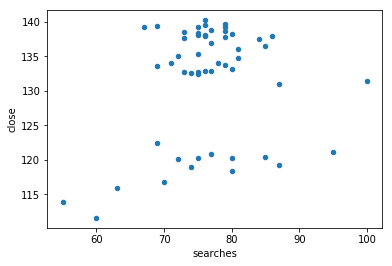

In [47]:
IBM.plot.scatter(x = "searches", y = "close")

In [48]:
np.corrcoef(IBM["searches"], IBM["close"])

array([[ 1., nan],
       [nan, nan]])

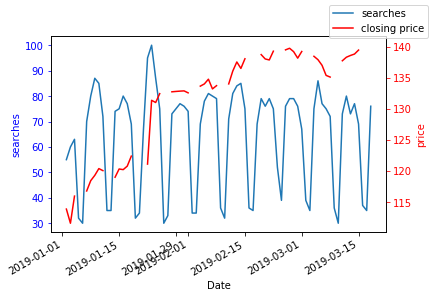

<Figure size 432x288 with 0 Axes>

In [49]:
fig, ax1 = plt.subplots()
plt.figure()
ax1.plot(IBM["searches"])
ax1.set_xlabel("Date")
ax1.set_ylabel("searches", color = "b")
ax1.tick_params("y", colors = "b")

ax2 = ax1.twinx()
ax2.plot(IBM["close"], "r")  #Plotting closing price as red.
ax2.set_ylabel("price", color = "r")
ax2.tick_params("y", colors = "r")

fig.autofmt_xdate()

fig.legend(("searches", "closing price"))
plt.show()

In [16]:
# not conclusive, but it seem like, after the searches goes up, the prices goes up steadily 
# aswell for a while. (the searches can be seen as a shock to the price, and it takes a while for the price to find a new level)
# the investors might be unsure wheter the increase will continue, and therefore wait some time before investing.

In [17]:
# The dates are in a different order

In [61]:
USbond = pd.read_csv("10 year bond Weekly.csv")
US_bond = USbond.drop([52, 0], axis = 0)
US_bond.head()

,Date,Price,Open,High,Low,Change %
1,"Dec 23, 2018",2.716,2.826,2.826,2.713,-2.58%
2,"Dec 16, 2018",2.788,2.895,2.898,2.748,-3.70%
3,"Dec 09, 2018",2.895,2.829,2.918,2.825,1.29%
4,"Dec 02, 2018",2.858,3.037,3.050,2.826,-4.51%
5,"Nov 25, 2018",2.993,3.050,3.079,2.988,-1.74%


In [63]:
US_bond.reset_index(drop = True)
US_bond.sort_index(axis = 0, level = None, ascending = False).head()

,Date,Price,Open,High,Low,Change %
51,"Jan 07, 2018",2.550,2.480,2.597,2.462,2.99%
50,"Jan 14, 2018",2.661,2.553,2.663,2.522,4.35%
49,"Jan 21, 2018",2.660,2.661,2.676,2.609,-0.04%
48,"Jan 28, 2018",2.841,2.658,2.854,2.654,6.80%
47,"Feb 04, 2018",2.857,2.847,2.885,2.648,0.56%


In [24]:
# Sørg for at den starter ved index 0 og ikke index 1, så skulle den være der, så de alligner.

In [25]:
#sæt de to figurer sammmen, men i stedet for IBM så din

In [64]:
SPX = pd.read_csv("SPX-weekly-2018.csv")
SPX2 = SPX.shift(-2, axis = 0)
SPX_weekly = SPX2.drop([51,52], axis = 0)

In [65]:
SPX_weekly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-08,2742.669922,2787.850098,2736.060059,2786.239990,2786.239990,1.748777e+10
1,2018-01-15,2798.959961,2810.330078,2768.639893,2810.300049,2810.300049,1.542492e+10
2,2018-01-22,2809.159912,2872.870117,2808.120117,2872.870117,2872.870117,1.828388e+10
3,2018-01-29,2867.229980,2870.620117,2759.969971,2762.129883,2762.129883,2.006534e+10
4,2018-02-05,2741.060059,2763.389893,2532.689941,2619.550049,2619.550049,2.678720e+10


In [66]:
SPX_weekly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
46,2018-11-26,2649.969971,2760.879883,2649.969971,2760.169922,2760.169922,1.910019e+10
47,2018-12-03,2790.500000,2800.179932,2621.530029,2633.080078,2633.080078,1.804406e+10
48,2018-12-10,2630.860107,2685.439941,2583.229980,2599.949951,2599.949951,1.997553e+10
49,2018-12-17,2590.750000,2601.129883,2408.550049,2416.620117,2416.620117,2.740996e+10
50,2018-12-24,2400.560059,2520.270020,2346.580078,2485.739990,2485.739990,1.464715e+10


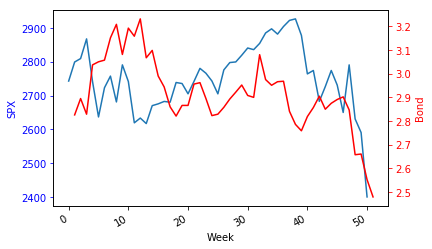

<Figure size 432x288 with 0 Axes>

In [68]:
fig, ax1 = plt.subplots()
plt.figure()

ax1.plot(SPX_weekly["Open"])
ax1.set_xlabel("Week")
ax1.set_ylabel("SPX", color = "b")
ax1.tick_params("y", colors = "b")


ax2 = ax1.twinx()
ax2.plot(US_bond["Open"], "r")  #Plotting closing price as red.
ax2.set_ylabel("Bond", color = "r")
ax2.tick_params("y", colors = "r")

fig.autofmt_xdate()
plt.show()

fig.autofmt_xdate()
plt.show()

In [69]:
np.corrcoef(SPX_weekly["Open"], US_bond["Open"])

array([[1.       , 0.1478871],
       [0.1478871, 1.       ]])

In [ ]:
# som forventet en positiv correlation. Når Obligations kurserne falder -> højere renter -> højere alternativafkast til aktier -> køber færre aktier -> aktiekurser falder. 
# ikke nødvendigvis alternativ? hvis man bare investere mindre generelt. 